In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import TimeDistributed
sc = MinMaxScaler(feature_range = (0,1))
df2 = []
import pandas as pd

In [2]:
df = pd.read_csv('Random10000_1to1000.csv', usecols=[0], engine='python')
print(df.head())
df = df.values
df = df.astype('float32')

   246
0  321
1  947
2  594
3  220
4  528


In [3]:
#df = df[:1000]
print(len(df))

9999


In [4]:
#print(df2)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

6999 3000


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(trainX.shape[1])

(6989, 10)
(6989,)
(2990, 10)
10


In [9]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [10]:
timesteps_ = look_back

inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=40, return_sequences = True, input_shape=(timesteps_,1))(tgt1)
#tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
#tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
#tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

#tgt5 = LSTM(units=120)(tgt4)
#tgt5 = Dropout(0.2)(tgt5)

predictions = Dense(1)(tgt4)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
153/153 [==============================] - 2s 13ms/step - loss: 0.2706 - mse: 0.1034 - mae: 0.2706 - val_loss: 0.2614 - val_mse: 0.0917 - val_mae: 0.2614
Epoch 2/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2560 - mse: 0.0886 - mae: 0.2560 - val_loss: 0.2563 - val_mse: 0.0897 - val_mae: 0.2563
Epoch 3/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2537 - mse: 0.0870 - mae: 0.2537 - val_loss: 0.2567 - val_mse: 0.0874 - val_mae: 0.2567
Epoch 4/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2546 - mse: 0.0875 - mae: 0.2546 - val_loss: 0.2690 - val_mse: 0.0991 - val_mae: 0.2690
Epoch 5/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2540 - mse: 0.0873 - mae: 0.2540 - val_loss: 0.2660 - val_mse: 0.0962 - val_mae: 0.2660
Epoch 6/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2544 - mse: 0.0868 - mae: 0.2544 - val_loss: 0.2574 - val_mse: 0.0879 - val_mae: 0.2574
Epoch 7/1

153/153 [==============================] - 1s 7ms/step - loss: 0.2519 - mse: 0.0845 - mae: 0.2519 - val_loss: 0.2553 - val_mse: 0.0862 - val_mae: 0.2553
Epoch 51/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2515 - mse: 0.0842 - mae: 0.2515 - val_loss: 0.2578 - val_mse: 0.0883 - val_mae: 0.2578
Epoch 52/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2519 - mse: 0.0843 - mae: 0.2519 - val_loss: 0.2536 - val_mse: 0.0854 - val_mae: 0.2536
Epoch 53/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2510 - mse: 0.0837 - mae: 0.2510 - val_loss: 0.2537 - val_mse: 0.0854 - val_mae: 0.2537
Epoch 54/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2512 - mse: 0.0840 - mae: 0.2512 - val_loss: 0.2562 - val_mse: 0.0869 - val_mae: 0.2562
Epoch 55/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2513 - mse: 0.0839 - mae: 0.2513 - val_loss: 0.2542 - val_mse: 0.0855 - val_mae: 0.2542
Epoch 56/100
153/

153/153 [==============================] - 1s 7ms/step - loss: 0.2512 - mse: 0.0837 - mae: 0.2512 - val_loss: 0.2547 - val_mse: 0.0858 - val_mae: 0.2547
Epoch 100/100
153/153 [==============================] - 1s 6ms/step - loss: 0.2509 - mse: 0.0835 - mae: 0.2509 - val_loss: 0.2547 - val_mse: 0.0859 - val_mae: 0.2547


timesteps :  10
mae  :  0.003279663622379303


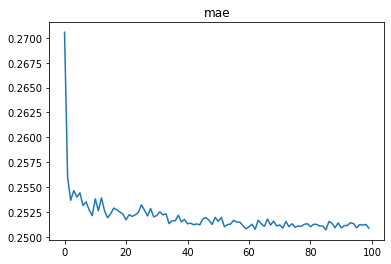

In [11]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  10


Text(0.5, 1.0, 'mse')

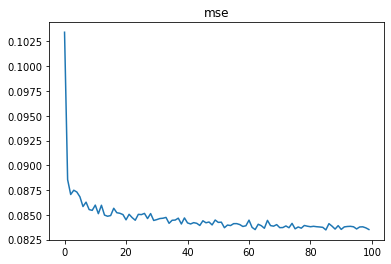

In [12]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

In [13]:
#模型評估
trainPredict = model.predict(trainX, batch_size=32)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=32)

In [14]:
from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 289.72 RMSE
Test Score: 288.06 RMSE
Train Score: 15.86 RMAE
Test Score: 15.79 RMAE


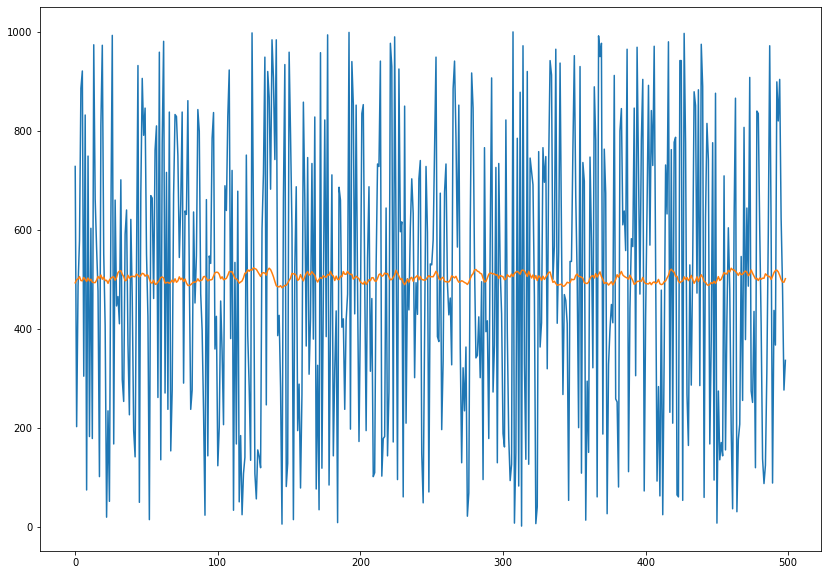

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(14, 10))
plt.plot(scaler.inverse_transform(dataset[9500:]))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[9500:])
plt.show()

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 10, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 10, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 40)           

In [17]:
from sklearn.metrics import r2_score
train_Y = trainY.T
test_Y = testY.T
print(r2_score(train_Y, trainPredict))
print(r2_score(test_Y, testPredict))

-0.00025399808619019915
-0.0020352507160084077


In [18]:
print(trainPredict.shape)

(6989, 1)


In [19]:
#model.save('U08D00_AIerror_ONU16_test0124_4layer.h5', include_optimizer=False)